In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading the Training data

In [ ]:
Train_df = pd.read_csv('TrafficTwoMonth.csv')
Train_df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal
...,...,...,...,...,...,...,...,...,...
5947,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
5948,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
5949,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
5950,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


In [ ]:
Train_df.shape

(5952, 9)

Loading the Test Data

In [ ]:
Test_df = pd.read_csv('Traffic.csv')
Test_df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


In [ ]:
print("Shape of train: ",Train_df.shape)
print("Shape of test",Test_df.shape)

Shape of train:  (5952, 9)
Shape of test (2976, 9)


In [ ]:
print('Training Data')
display(Train_df.info())
print('Testing Data')
display(Test_df.info())

Training Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               5952 non-null   object
 1   Date               5952 non-null   int64 
 2   Day of the week    5952 non-null   object
 3   CarCount           5952 non-null   int64 
 4   BikeCount          5952 non-null   int64 
 5   BusCount           5952 non-null   int64 
 6   TruckCount         5952 non-null   int64 
 7   Total              5952 non-null   int64 
 8   Traffic Situation  5952 non-null   object
dtypes: int64(6), object(3)
memory usage: 418.6+ KB


None

Testing Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


None

Visualization of the training data

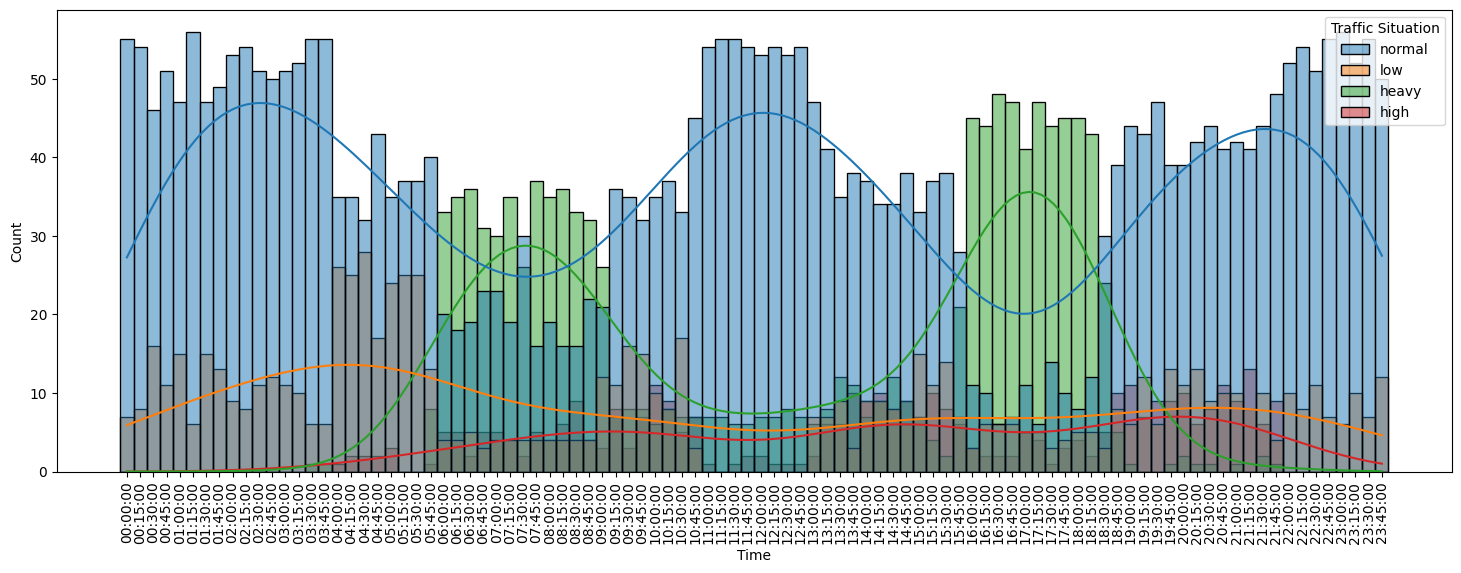

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
time_train_DF = Train_df.sort_values(by='Time')
time_train_DF['Time'] = pd.to_datetime(time_train_DF['Time'], format='%I:%M:%S %p')
time_train_DF['Time'] = time_train_DF['Time'].dt.time.astype(str)
plt.figure(figsize=(18, 6))
sns.histplot(time_train_DF.sort_values(by='Time'), x='Time', hue='Traffic Situation', kde=True)
plt.xticks(rotation=90)
plt.show()

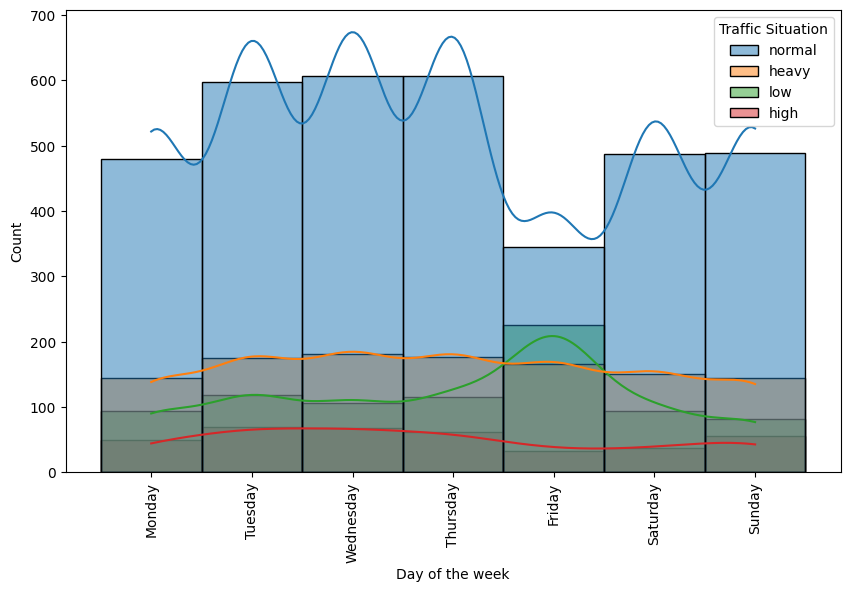

In [ ]:
dayDF = Train_df
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dayDF['Day of the week'] = pd.Categorical(dayDF['Day of the week'], categories=day_order, ordered=True)
plt.figure(figsize=(10, 6))
sns.histplot(dayDF.sort_values(by='Day of the week'),x='Day of the week',hue='Traffic Situation',kde=True)
plt.xticks(rotation=90)
plt.show()

Preprocessing

In [ ]:
#Preprocessing Testing set
TDf = Train_df.sort_values(by='Time')
TDf['Time'] = pd.to_datetime(Train_df['Time'], format='%I:%M:%S %p')

In [ ]:
from time import time_ns
TDf['Hour'] = TDf['Time'].dt.hour
TDf['Minute'] = TDf['Time'].dt.minute
TDf['Second'] = TDf['Time'].dt.second
TDf['Time'] = (TDf['Hour'] * 3600) + (TDf['Minute'] * 60) + TDf['Second']
TDf = TDf.drop(['Hour', 'Minute', 'Second'], axis=1)
TDf =TDf.sort_values(by='Time')
TDf

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
5760,0,8,Wednesday,17,2,1,20,40,normal
0,0,10,Tuesday,13,2,2,24,41,normal
1632,0,27,Friday,5,2,2,32,41,normal
4896,0,30,Monday,13,3,1,12,29,low
1152,0,22,Sunday,11,0,1,24,36,normal
...,...,...,...,...,...,...,...,...,...
3743,85500,17,Tuesday,20,1,1,38,60,normal
3647,85500,16,Monday,10,4,1,12,27,low
1439,85500,24,Tuesday,12,1,0,24,37,normal
4895,85500,29,Sunday,16,1,0,12,29,low


In [ ]:
TDf['Day of the week'] = TDf['Day of the week'].replace({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday': 6,'Sunday':7})
TDf['Traffic Situation'] = TDf['Traffic Situation'].replace({'low': 0,'normal': 1,'high': 2, 'heavy':3})
TDf

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
5760,0,8,3,17,2,1,20,40,1
0,0,10,2,13,2,2,24,41,1
1632,0,27,5,5,2,2,32,41,1
4896,0,30,1,13,3,1,12,29,0
1152,0,22,7,11,0,1,24,36,1
...,...,...,...,...,...,...,...,...,...
3743,85500,17,2,20,1,1,38,60,1
3647,85500,16,1,10,4,1,12,27,0
1439,85500,24,2,12,1,0,24,37,1
4895,85500,29,7,16,1,0,12,29,0


In [ ]:
X_train = TDf.drop(columns=["Traffic Situation"],axis=1)
y_train = TDf["Traffic Situation"]

Converting the Training and Test set in scaler form

Testing Data Set

In [ ]:
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()
X_train = StandardScaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)

In [ ]:
X_train

,0,1,2,3,4,5,6,7
0,-1.714102,-0.894427,-0.465504,-1.082581,-0.880773,-0.953290,0.123372,-1.235211
1,-1.714102,-0.670820,-0.980884,-1.171975,-0.880773,-0.873269,0.487929,-1.217351
2,-1.714102,1.229837,0.565255,-1.350764,-0.880773,-0.873269,1.217043,-1.217351
3,-1.714102,1.565248,-1.496264,-1.171975,-0.794095,-0.953290,-0.605742,-1.431669
4,-1.714102,0.670820,1.596015,-1.216672,-1.054129,-0.953290,0.487929,-1.306650
...,...,...,...,...,...,...,...,...
5947,1.714102,0.111803,-0.980884,-1.015535,-0.967451,-0.953290,1.763879,-0.878015
5948,1.714102,0.000000,-1.496264,-1.239021,-0.707418,-0.953290,-0.605742,-1.467389
5949,1.714102,0.894427,-0.980884,-1.194324,-0.967451,-1.033312,0.487929,-1.288791
5950,1.714102,1.453444,1.596015,-1.104929,-0.967451,-1.033312,-0.605742,-1.431669


Training Set

In [ ]:
TestDf = Test_df.sort_values(by='Time')
TestDf['Time'] = pd.to_datetime(Test_df['Time'], format='%I:%M:%S %p')

In [ ]:
from time import time_ns
TestDf['Hour'] = TestDf['Time'].dt.hour
TestDf['Minute'] = TestDf['Time'].dt.minute
TestDf['Second'] = TestDf['Time'].dt.second
TestDf['Time'] = (TestDf['Hour'] * 3600) + (TestDf['Minute'] * 60) + TestDf['Second']
TestDf = TestDf.drop(['Hour', 'Minute', 'Second'], axis=1)
TestDf =TestDf.sort_values(by='Time')
TestDf = TestDf.reset_index(drop=True)
TestDf

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,0,8,Wednesday,17,2,1,20,40,normal
1,0,10,Tuesday,31,0,4,4,39,low
2,0,31,Tuesday,18,1,0,30,49,normal
3,0,1,Wednesday,14,0,0,34,48,normal
4,0,2,Thursday,12,5,1,38,56,normal
...,...,...,...,...,...,...,...,...,...
2971,85500,21,Sunday,10,2,1,15,28,normal
2972,85500,25,Wednesday,16,4,1,30,51,normal
2973,85500,12,Thursday,16,3,0,33,52,normal
2974,85500,8,Wednesday,10,5,0,14,29,normal


In [ ]:
TestDf['Day of the week'] = TestDf['Day of the week'].replace({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday': 6,'Sunday':7})
TestDf['Traffic Situation'] = TestDf['Traffic Situation'].replace({'low': 0,'normal': 1,'high': 2, 'heavy':3})
TestDf

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,0,8,3,17,2,1,20,40,1
1,0,10,2,31,0,4,4,39,0
2,0,31,2,18,1,0,30,49,1
3,0,1,3,14,0,0,34,48,1
4,0,2,4,12,5,1,38,56,1
...,...,...,...,...,...,...,...,...,...
2971,85500,21,7,10,2,1,15,28,1
2972,85500,25,3,16,4,1,30,51,1
2973,85500,12,4,16,3,0,33,52,1
2974,85500,8,3,10,5,0,14,29,1


In [ ]:
X_test = TestDf.drop(columns=["Traffic Situation"],axis=1)
y_test = TestDf["Traffic Situation"]

In [ ]:
X_test = StandardScaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test)
X_test

,0,1,2,3,4,5,6,7
0,-1.714102,-0.894427,-0.465504,-1.127688,-1.005604,-0.995815,0.440959,-1.233263
1,-1.714102,-0.670820,-0.980884,-0.822297,-1.161302,-0.786604,-1.068183,-1.249880
2,-1.714102,1.677051,-0.980884,-1.105874,-1.083453,-1.065552,1.384172,-1.083713
3,-1.714102,-1.677051,-0.465504,-1.193128,-1.161302,-1.065552,1.761458,-1.100330
4,-1.714102,-1.565248,0.049875,-1.236756,-0.772056,-0.995815,2.138743,-0.967396
...,...,...,...,...,...,...,...,...
2971,1.714102,0.559017,1.596015,-1.280383,-1.005604,-0.995815,-0.030648,-1.432663
2972,1.714102,1.006231,-0.465504,-1.149501,-0.849905,-0.995815,1.384172,-1.050480
2973,1.714102,-0.447214,0.049875,-1.149501,-0.927754,-1.065552,1.667137,-1.033863
2974,1.714102,-0.894427,-0.465504,-1.280383,-0.772056,-1.065552,-0.124969,-1.416047


Processing

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()

In [ ]:
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_lr = logistic_regression.predict(X_test.values)

In [ ]:
y_pred_lr_df = pd.DataFrame(y_pred_lr)
y_pred_lr_df = y_pred_lr_df.set_axis(axis=1,labels=['pred_traffic'])

In [ ]:
Test_pred_Df_lr = TestDf.merge(y_pred_lr_df,how='inner',left_index=True,right_index=True)
Test_pred_Df_lr

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,pred_traffic
0,0,8,3,17,2,1,20,40,1,1
1,0,10,2,31,0,4,4,39,0,0
2,0,31,2,18,1,0,30,49,1,1
3,0,1,3,14,0,0,34,48,1,1
4,0,2,4,12,5,1,38,56,1,1
...,...,...,...,...,...,...,...,...,...,...
2971,85500,21,7,10,2,1,15,28,1,0
2972,85500,25,3,16,4,1,30,51,1,1
2973,85500,12,4,16,3,0,33,52,1,1
2974,85500,8,3,10,5,0,14,29,1,0


Logistic Regression accuracy is: 81.519%


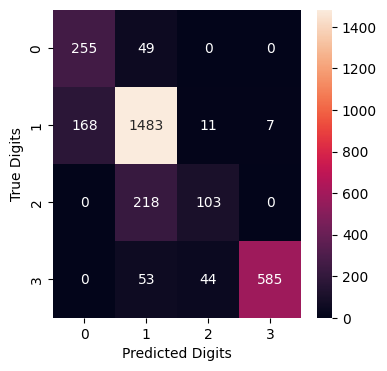

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
LR_acc = accuracy_score(Test_pred_Df_lr['Traffic Situation'], Test_pred_Df_lr['pred_traffic'])
print("Logistic Regression accuracy is: {0:.3f}%".format(LR_acc * 100))
cm = confusion_matrix(Test_pred_Df_lr['Traffic Situation'], Test_pred_Df_lr['pred_traffic'])
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()

In [ ]:
print("Logistic Regression Classification Report:")
print(classification_report(Test_pred_Df_lr['Traffic Situation'], Test_pred_Df_lr['pred_traffic']))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.84      0.70       304
           1       0.82      0.89      0.85      1669
           2       0.65      0.32      0.43       321
           3       0.99      0.86      0.92       682

    accuracy                           0.82      2976
   macro avg       0.77      0.73      0.73      2976
weighted avg       0.82      0.82      0.81      2976



Decession Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [ ]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt = decision_tree.predict(X_test.values)
y_pred_dt_df = pd.DataFrame(y_pred_dt)
y_pred_dt_df = y_pred_dt_df.set_axis(axis=1,labels=['pred_traffic'])
Test_pred_Df_dt = TestDf.merge(y_pred_dt_df,how='inner',left_index=True,right_index=True)
Test_pred_Df_dt

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,pred_traffic
0,0,8,3,17,2,1,20,40,1,1
1,0,10,2,31,0,4,4,39,0,0
2,0,31,2,18,1,0,30,49,1,1
3,0,1,3,14,0,0,34,48,1,1
4,0,2,4,12,5,1,38,56,1,1
...,...,...,...,...,...,...,...,...,...,...
2971,85500,21,7,10,2,1,15,28,1,0
2972,85500,25,3,16,4,1,30,51,1,1
2973,85500,12,4,16,3,0,33,52,1,1
2974,85500,8,3,10,5,0,14,29,1,0


Decision Tree accuracy is: 85.517%


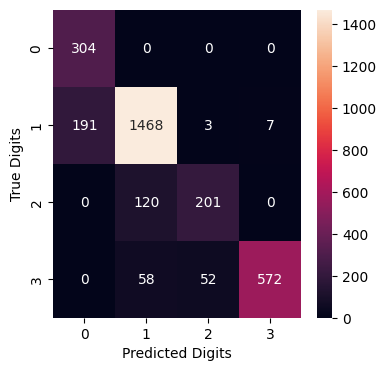

In [ ]:
DT_acc = accuracy_score(Test_pred_Df_dt['Traffic Situation'], Test_pred_Df_dt['pred_traffic'])
print("Decision Tree accuracy is: {0:.3f}%".format(DT_acc * 100))
cm = confusion_matrix(Test_pred_Df_dt['Traffic Situation'], Test_pred_Df_dt['pred_traffic'])
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()

In [ ]:
print("Decision Tree Classification Report:")
print(classification_report(Test_pred_Df_dt['Traffic Situation'], Test_pred_Df_dt['pred_traffic']))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       304
           1       0.89      0.88      0.89      1669
           2       0.79      0.63      0.70       321
           3       0.99      0.84      0.91       682

    accuracy                           0.86      2976
   macro avg       0.82      0.84      0.81      2976
weighted avg       0.87      0.86      0.86      2976



K Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn.predict(X_test.values)
y_pred_knn_df = pd.DataFrame(y_pred_knn)
y_pred_knn_df = y_pred_knn_df.set_axis(axis=1,labels=['pred_traffic'])
Test_pred_Df_knn = TestDf.merge(y_pred_knn_df,how='inner',left_index=True,right_index=True)
Test_pred_Df_knn

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,pred_traffic
0,0,8,3,17,2,1,20,40,1,1
1,0,10,2,31,0,4,4,39,0,0
2,0,31,2,18,1,0,30,49,1,1
3,0,1,3,14,0,0,34,48,1,1
4,0,2,4,12,5,1,38,56,1,1
...,...,...,...,...,...,...,...,...,...,...
2971,85500,21,7,10,2,1,15,28,1,1
2972,85500,25,3,16,4,1,30,51,1,1
2973,85500,12,4,16,3,0,33,52,1,1
2974,85500,8,3,10,5,0,14,29,1,0


K Neighbors accuracy is: 86.828%


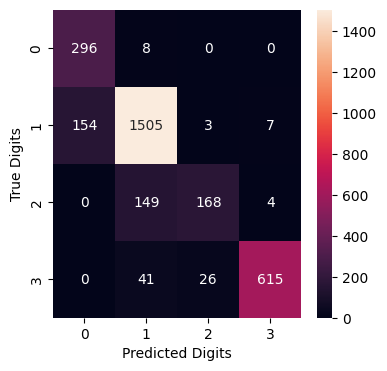

In [ ]:
KNN_acc = accuracy_score(Test_pred_Df_knn['Traffic Situation'], Test_pred_Df_knn['pred_traffic'])
print("K Neighbors accuracy is: {0:.3f}%".format(KNN_acc * 100))
cm = confusion_matrix(Test_pred_Df_knn['Traffic Situation'], Test_pred_Df_knn['pred_traffic'])
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()

In [ ]:
print("KNN Classification Report:")
print(classification_report(Test_pred_Df_knn['Traffic Situation'], Test_pred_Df_knn['pred_traffic']))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.97      0.79       304
           1       0.88      0.90      0.89      1669
           2       0.85      0.52      0.65       321
           3       0.98      0.90      0.94       682

    accuracy                           0.87      2976
   macro avg       0.84      0.83      0.82      2976
weighted avg       0.88      0.87      0.87      2976



Visualization of the Results

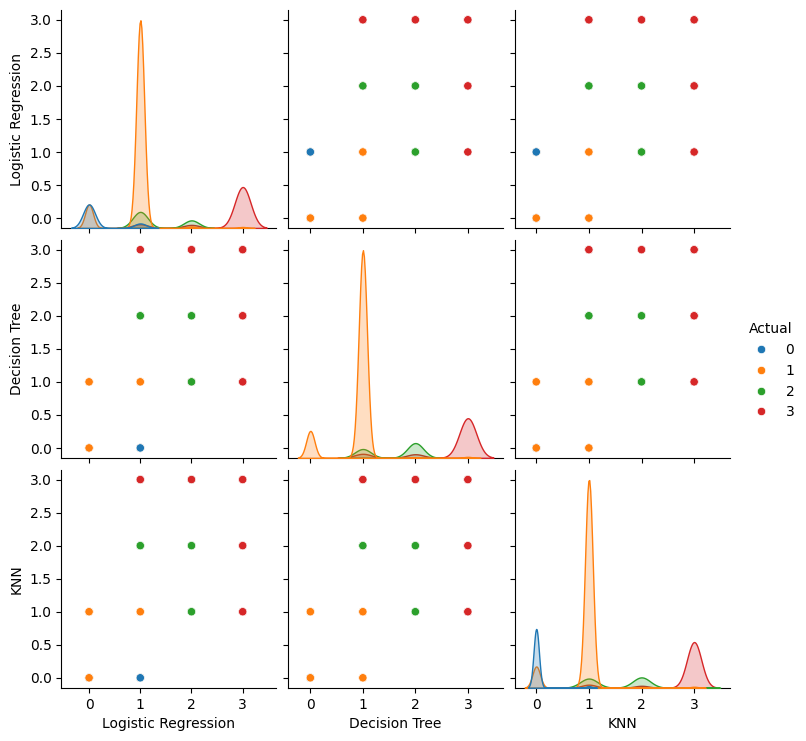

In [ ]:
results_df = pd.DataFrame({'Actual': y_test,
                               'Logistic Regression': y_pred_lr,
                               'Decision Tree': y_pred_dt,
                               'KNN': y_pred_knn})
Test_pred_results = TestDf.merge(results_df,how='inner',left_index=True,right_index=True)
# Create a pair plot
sns.pairplot(data=Test_pred_results,
             vars=['Logistic Regression', 'Decision Tree', 'KNN'],
             hue='Actual',
             palette='tab10')
plt.show()

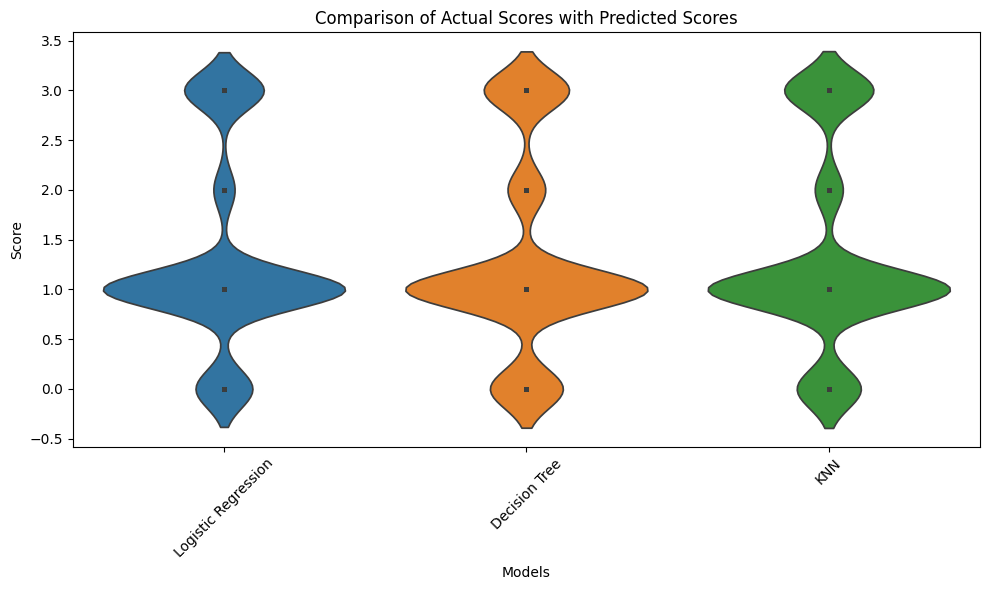

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=results_df.drop('Actual', axis=1), inner="point", ax=plt.gca())
plt.title('Comparison of Actual Scores with Predicted Scores')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('violin_plot.png')
plt.show()

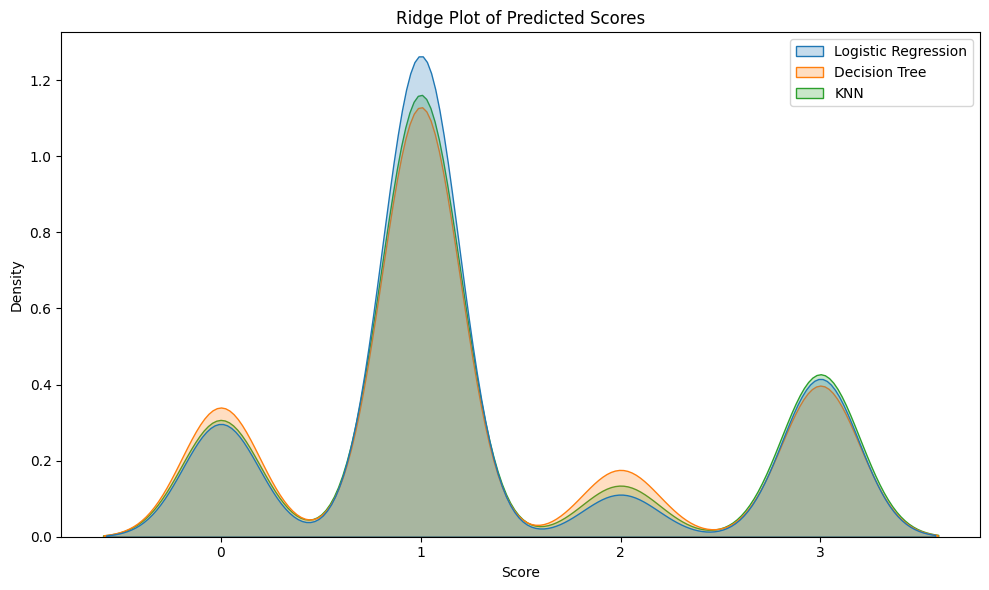

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=results_df.drop('Actual', axis=1), fill=True, common_norm=False)
plt.title('Ridge Plot of Predicted Scores')
plt.xlabel('Score')
plt.ylabel('Density')
plt.tight_layout()
plt.savefig('ridge_plot.png')
plt.show()
